In [2631]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2632]:
#load the datasets
df = pd.read_csv('application_record.csv')
df1 = pd.read_csv('credit_record.csv')

In [2633]:
df.head(3)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0


In [2634]:
df1.head(3)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0


In [2635]:
#display column names for readability
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [2636]:
# rename columns
df.rename(columns = {'CODE_GENDER': 'GENDER','FLAG_OWN_CAR':'OWNS CAR', 'FLAG_OWN_REALTY':'OWNS REALTY', 'CNT_CHILDREN':'CHILDREN',
       'AMT_INCOME_TOTAL':'ANNUAL INCOME', 'NAME_INCOME_TYPE':'INCOME CATEGORY', 'NAME_EDUCATION_TYPE':'EDUCATION',
       'NAME_FAMILY_STATUS':'MARITAL STATUS', 'NAME_HOUSING_TYPE':'HOUSING TYPE', 'DAYS_BIRTH':'AGE',
       'DAYS_EMPLOYED':'DAYS EMPLOYED', 'FLAG_MOBIL':'CELL PHONE', 'FLAG_WORK_PHONE':'WORK PHONE', 'FLAG_PHONE':'PHONE',
       'FLAG_EMAIL':'EMAIL', 'OCCUPATION_TYPE':'OCCUPATION', 'CNT_FAM_MEMBERS':'FAMILY SIZE' }, inplace = True)

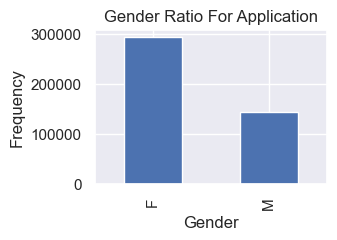

In [2637]:
df['GENDER'].value_counts().plot(kind='bar', title= 'Gender Ratio For Application', figsize = (3,2))
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

In [2638]:
#convert categorical to numerical
df['OWNS CAR'] = df['OWNS CAR'].str.replace('Y','1')
df['OWNS CAR'] = df['OWNS CAR'].str.replace('N','0')
df.astype({'OWNS CAR':'int64'})

df['OWNS REALTY'] = df['OWNS REALTY'].str.replace('Y','1')
df['OWNS REALTY'] = df['OWNS REALTY'].str.replace('N','0')
df.astype({'OWNS REALTY':'int64'})


df['GENDER'] = df['GENDER'].str.replace('M','1')
df['GENDER'] = df['GENDER'].str.replace('F','0')
df.astype({'GENDER':'int64'})

,ID,GENDER,OWNS CAR,OWNS REALTY,CHILDREN,ANNUAL INCOME,INCOME CATEGORY,EDUCATION,MARITAL STATUS,HOUSING TYPE,AGE,DAYS EMPLOYED,CELL PHONE,WORK PHONE,PHONE,EMAIL,OCCUPATION,FAMILY SIZE
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,1,0,1,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,0,0,0,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,0,0,0,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,0,0,1,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [2639]:
#convert float column to integer 
"""df.astype({'ANNUAL INCOME':'int64'})
df.astype({'FAMILY SIZE':'int64'})"""
df['ANNUAL INCOME']=df['ANNUAL INCOME'].astype(int)
df['FAMILY SIZE']=df['FAMILY SIZE'].astype(int)

In [2640]:
df.head()

,ID,GENDER,OWNS CAR,OWNS REALTY,CHILDREN,ANNUAL INCOME,INCOME CATEGORY,EDUCATION,MARITAL STATUS,HOUSING TYPE,AGE,DAYS EMPLOYED,CELL PHONE,WORK PHONE,PHONE,EMAIL,OCCUPATION,FAMILY SIZE
0,5008804,1,1,1,0,427500,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
1,5008805,1,1,1,0,427500,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
2,5008806,1,1,1,0,112500,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2
3,5008808,0,0,1,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
4,5008809,0,0,1,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1


### Missing Values

In [2641]:
#detect null columns
df.isnull().any()

ID                 False
GENDER             False
OWNS CAR           False
OWNS REALTY        False
CHILDREN           False
ANNUAL INCOME      False
INCOME CATEGORY    False
EDUCATION          False
MARITAL STATUS     False
HOUSING TYPE       False
AGE                False
DAYS EMPLOYED      False
CELL PHONE         False
WORK PHONE         False
PHONE              False
EMAIL              False
OCCUPATION          True
FAMILY SIZE        False
dtype: bool

In [2642]:
df1.dropna()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [2643]:
#merge both dataframe
new_df = pd.merge(df,df1,on= 'ID')

In [2644]:
new_df.columns

Index(['ID', 'GENDER', 'OWNS CAR', 'OWNS REALTY', 'CHILDREN', 'ANNUAL INCOME',
       'INCOME CATEGORY', 'EDUCATION', 'MARITAL STATUS', 'HOUSING TYPE', 'AGE',
       'DAYS EMPLOYED', 'CELL PHONE', 'WORK PHONE', 'PHONE', 'EMAIL',
       'OCCUPATION', 'FAMILY SIZE', 'MONTHS_BALANCE', 'STATUS'],
      dtype='object')

In [2645]:
new_df.head()

,ID,GENDER,OWNS CAR,OWNS REALTY,CHILDREN,ANNUAL INCOME,INCOME CATEGORY,EDUCATION,MARITAL STATUS,HOUSING TYPE,AGE,DAYS EMPLOYED,CELL PHONE,WORK PHONE,PHONE,EMAIL,OCCUPATION,FAMILY SIZE,MONTHS_BALANCE,STATUS
0,5008804,1,1,1,0,427500,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,0,C
1,5008804,1,1,1,0,427500,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-1,C
2,5008804,1,1,1,0,427500,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-2,C
3,5008804,1,1,1,0,427500,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-3,C
4,5008804,1,1,1,0,427500,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-4,C


In [2646]:
#convert days to age.
new_df['AGE'] = -(new_df['AGE'])//365
new_df['YEARS EMPLOYED'] = -(new_df['DAYS EMPLOYED'])//365

In [2647]:
#convert negative months balance to positive
new_df['MONTHS DUE'] = -(df1['MONTHS_BALANCE'])

In [2648]:
new_df.columns

Index(['ID', 'GENDER', 'OWNS CAR', 'OWNS REALTY', 'CHILDREN', 'ANNUAL INCOME',
       'INCOME CATEGORY', 'EDUCATION', 'MARITAL STATUS', 'HOUSING TYPE', 'AGE',
       'DAYS EMPLOYED', 'CELL PHONE', 'WORK PHONE', 'PHONE', 'EMAIL',
       'OCCUPATION', 'FAMILY SIZE', 'MONTHS_BALANCE', 'STATUS',
       'YEARS EMPLOYED', 'MONTHS DUE'],
      dtype='object')

###  DATA ANALYSIS

In [2649]:
#create barplot for martial status of applicants
plt.figure(figsize = (10,4))
sns.barplot(new_df['MARITAL STATUS'].value_counts().index,new_df['MARITAL STATUS'].value_counts().values)
plt.xticks(rotation=45, horizontalalignment='right')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Married'),
  Text(1, 0, 'Single / not married'),
  Text(2, 0, 'Civil marriage'),
  Text(3, 0, 'Separated'),
  Text(4, 0, 'Widow')])

In [2650]:
#create barplot for income category of applicants
plt.figure(figsize = (10,4))
sns.barplot(new_df['INCOME CATEGORY'].value_counts().index,new_df['INCOME CATEGORY'].value_counts().values)
plt.xticks(rotation=45, horizontalalignment='right')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Working'),
  Text(1, 0, 'Commercial associate'),
  Text(2, 0, 'Pensioner'),
  Text(3, 0, 'State servant'),
  Text(4, 0, 'Student')])

In [2651]:
#create barplot for education of applicants
plt.figure(figsize = (10,4))
sns.barplot(new_df['EDUCATION'].value_counts().index,new_df['EDUCATION'].value_counts().values)
plt.xticks(rotation=45, horizontalalignment='right')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Secondary / secondary special'),
  Text(1, 0, 'Higher education'),
  Text(2, 0, 'Incomplete higher'),
  Text(3, 0, 'Lower secondary'),
  Text(4, 0, 'Academic degree')])

In [2652]:
#create barplot for housing type of applicants
plt.figure(figsize = (10,4))
sns.barplot(new_df['HOUSING TYPE'].value_counts().index,new_df['HOUSING TYPE'].value_counts().values)
plt.xticks(rotation=45, horizontalalignment='right')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'House / apartment'),
  Text(1, 0, 'With parents'),
  Text(2, 0, 'Municipal apartment'),
  Text(3, 0, 'Rented apartment'),
  Text(4, 0, 'Office apartment'),
  Text(5, 0, 'Co-op apartment')])

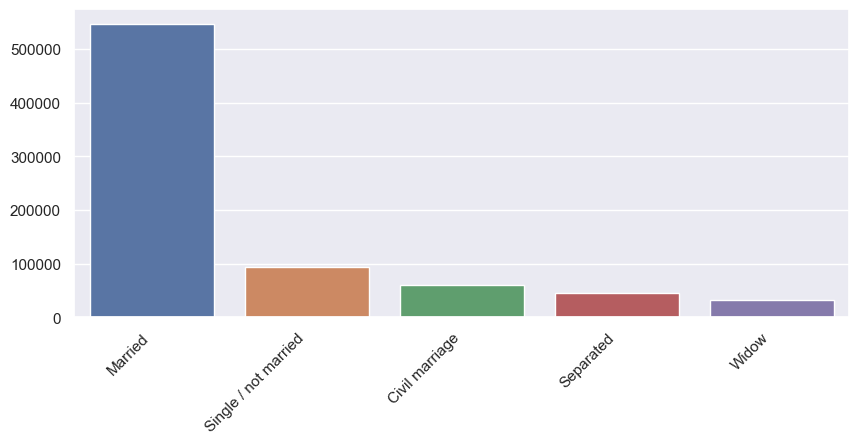

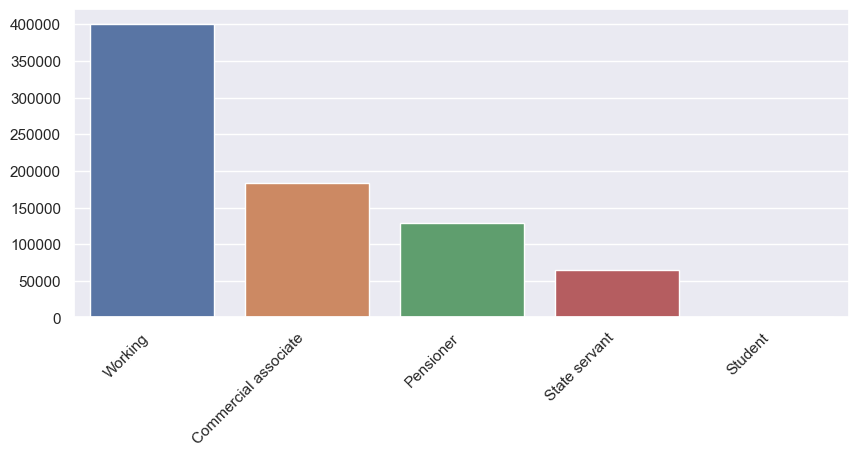

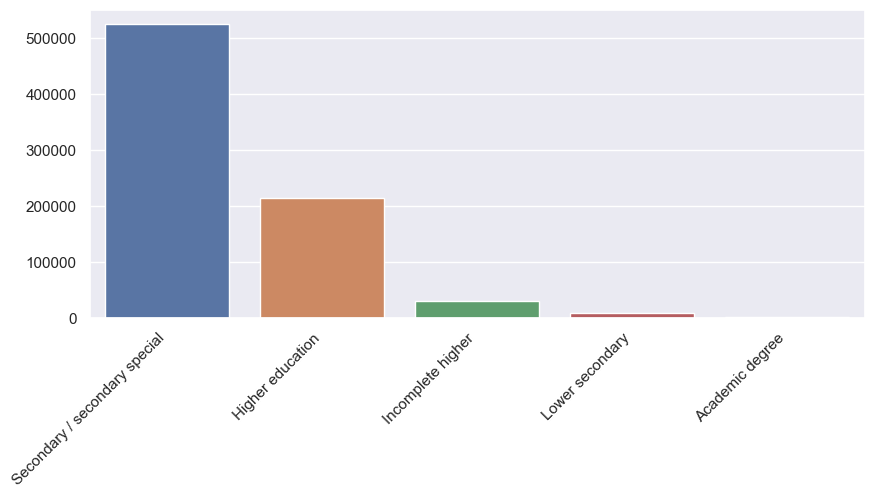

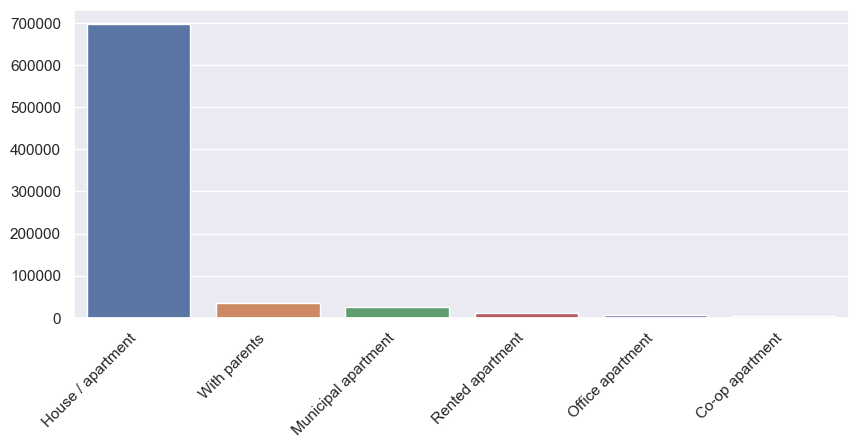

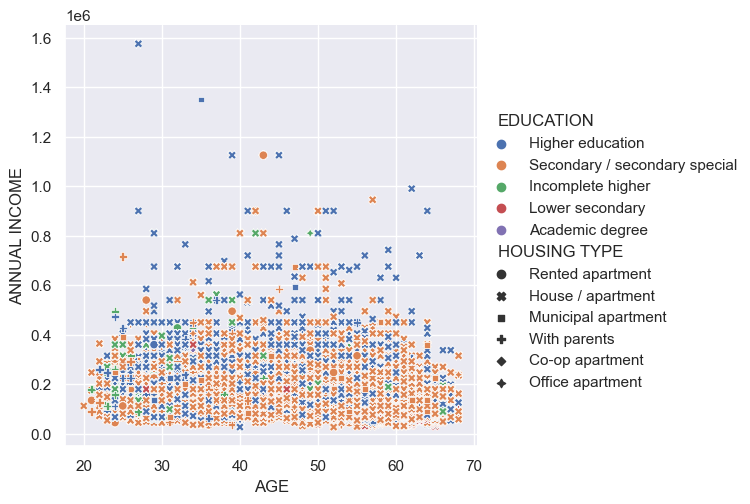

In [2653]:
ax = sns.relplot(data= new_df, x= 'AGE',y='ANNUAL INCOME', hue= 'EDUCATION', style= 'HOUSING TYPE', size_order = [5,5])
plt.show()

In [2654]:
new_df.drop(['ID', 'INCOME CATEGORY','MONTHS DUE','EDUCATION','DAYS EMPLOYED','MONTHS_BALANCE', 'MARITAL STATUS', 'HOUSING TYPE','CELL PHONE','WORK PHONE', 'PHONE', 'EMAIL',
       'OCCUPATION'],axis =1,inplace = True)

In [2655]:
new_df.isnull().any()

GENDER            False
OWNS CAR          False
OWNS REALTY       False
CHILDREN          False
ANNUAL INCOME     False
AGE               False
FAMILY SIZE       False
STATUS            False
YEARS EMPLOYED    False
dtype: bool

In [2656]:
new_df.head()

,GENDER,OWNS CAR,OWNS REALTY,CHILDREN,ANNUAL INCOME,AGE,FAMILY SIZE,STATUS,YEARS EMPLOYED
0,1,1,1,0,427500,32,2,C,12
1,1,1,1,0,427500,32,2,C,12
2,1,1,1,0,427500,32,2,C,12
3,1,1,1,0,427500,32,2,C,12
4,1,1,1,0,427500,32,2,C,12


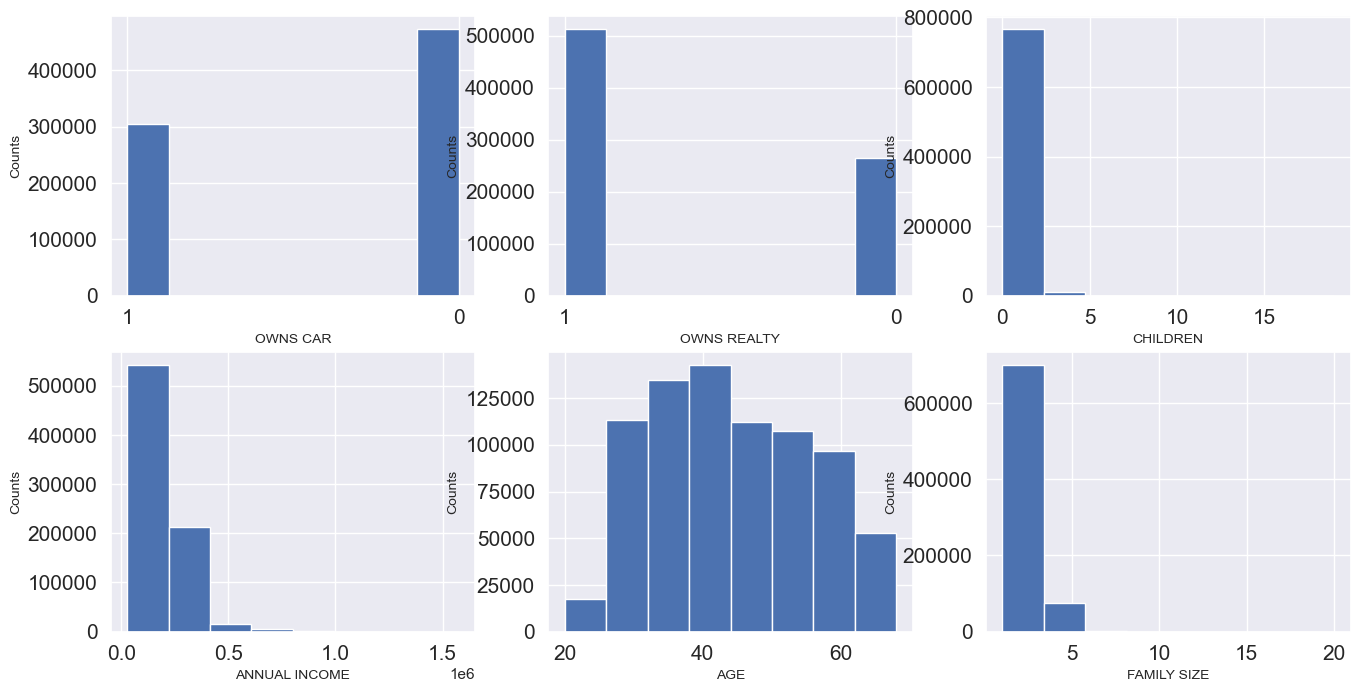

In [2657]:
# set up the figure size
plt.rcParams['figure.figsize'] = (16,8)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 3)

# Specify features of interest
num_features = ['OWNS CAR', 'OWNS REALTY', 'CHILDREN', 'ANNUAL INCOME','AGE', 'FAMILY SIZE']

xaxes = num_features
yaxes = ['Counts','Counts','Counts','Counts','Counts','Counts' ]

# Draw histogram
axes = axes.ravel()

for idx, ax in enumerate(axes):
    ax.hist(new_df[num_features[idx]].dropna(), bins=8)
    ax.set_xlabel(xaxes[idx], fontsize=10)
    ax.set_ylabel(yaxes[idx], fontsize=10)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

In [2658]:
new_df.columns

Index(['GENDER', 'OWNS CAR', 'OWNS REALTY', 'CHILDREN', 'ANNUAL INCOME', 'AGE',
       'FAMILY SIZE', 'STATUS', 'YEARS EMPLOYED'],
      dtype='object')

In [2659]:
# for status 0 denotes good while 1 represents bad
new_df['STATUS'].replace(['C','X'],0, inplace = True)
new_df['STATUS'].replace(('2','3','4','5'),1, inplace = True)
new_df.astype({'STATUS':'int64'})

,GENDER,OWNS CAR,OWNS REALTY,CHILDREN,ANNUAL INCOME,AGE,FAMILY SIZE,STATUS,YEARS EMPLOYED
0,1,1,1,0,427500,32,2,0,12
1,1,1,1,0,427500,32,2,0,12
2,1,1,1,0,427500,32,2,0,12
3,1,1,1,0,427500,32,2,0,12
4,1,1,1,0,427500,32,2,0,12
...,...,...,...,...,...,...,...,...,...
777710,1,0,1,0,112500,25,1,0,3
777711,1,0,1,0,112500,25,1,1,3
777712,1,0,1,0,112500,25,1,1,3
777713,1,0,1,0,112500,25,1,0,3


In [2660]:
new_df.columns

Index(['GENDER', 'OWNS CAR', 'OWNS REALTY', 'CHILDREN', 'ANNUAL INCOME', 'AGE',
       'FAMILY SIZE', 'STATUS', 'YEARS EMPLOYED'],
      dtype='object')

In [2661]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   GENDER          777715 non-null  object
 1   OWNS CAR        777715 non-null  object
 2   OWNS REALTY     777715 non-null  object
 3   CHILDREN        777715 non-null  int64 
 4   ANNUAL INCOME   777715 non-null  int32 
 5   AGE             777715 non-null  int64 
 6   FAMILY SIZE     777715 non-null  int32 
 7   STATUS          777715 non-null  object
 8   YEARS EMPLOYED  777715 non-null  int64 
dtypes: int32(2), int64(3), object(4)
memory usage: 53.4+ MB


In [2662]:
new_df = new_df.astype(int)

In [2663]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   GENDER          777715 non-null  int32
 1   OWNS CAR        777715 non-null  int32
 2   OWNS REALTY     777715 non-null  int32
 3   CHILDREN        777715 non-null  int32
 4   ANNUAL INCOME   777715 non-null  int32
 5   AGE             777715 non-null  int32
 6   FAMILY SIZE     777715 non-null  int32
 7   STATUS          777715 non-null  int32
 8   YEARS EMPLOYED  777715 non-null  int32
dtypes: int32(9)
memory usage: 32.6 MB


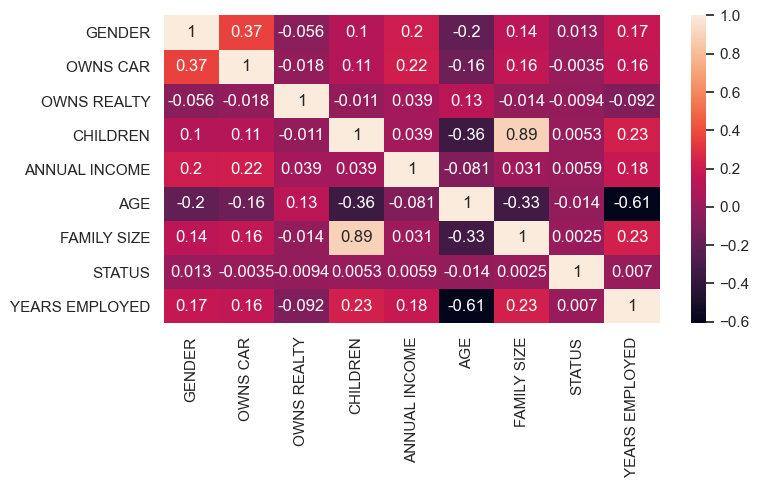

In [2664]:
plt.figure(figsize =(8,4))
dfMatrix = new_df.corr()
sns.heatmap(dfMatrix, annot = True)
plt.show()

In [2665]:
"""The value of correlation coefficient can take any values from -1 to 1.

If the value is 1, it is said to be positive correlation between two variables.
This means that when one variable increases, the other variable also increases.

If the value is -1, it is said to be negative correlation between two variables.
This means that when one variable increases, the other variable decreases.

If the value is 0, there is no correlation between two variables. 
This means that the variables changes in a random manner with respect to each other."""

'The value of correlation coefficient can take any values from -1 to 1.\n\nIf the value is 1, it is said to be positive correlation between two variables.\nThis means that when one variable increases, the other variable also increases.\n\nIf the value is -1, it is said to be negative correlation between two variables.\nThis means that when one variable increases, the other variable decreases.\n\nIf the value is 0, there is no correlation between two variables. \nThis means that the variables changes in a random manner with respect to each other.'

In [2666]:
'https://stackoverflow.com/questions/63580692/convert-all-non-numeric-column-in-numeric-sklearn-python'

'https://stackoverflow.com/questions/63580692/convert-all-non-numeric-column-in-numeric-sklearn-python'

In [2667]:
X = new_df.drop(['STATUS'],axis =1)
y = new_df['STATUS']

### Machine Learning Model

In [2675]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 30)

In [2677]:
#Using logistic regression model, fitting the model and 
model = LogisticRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)

###### Model performance evaluation

In [2682]:
#display text report showing the main classification metrics
#display confusion matrix to evaluate the accuracy of a classification
#display Accuracy classification score.
print("\n metrics.classification_report(ytest, predict) \n", metrics.classification_report(y_test, predict))
print("\n metrics.confusion_matrix(ytest, predict) \n", metrics.confusion_matrix(y_test, predict))
print("\n metrics.accuracy_score(ytest, predict) \n", metrics.accuracy_score(y_test, predict))


 metrics.classification_report(ytest, predict) 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    153258
           1       0.00      0.00      0.00      2285

    accuracy                           0.99    155543
   macro avg       0.49      0.50      0.50    155543
weighted avg       0.97      0.99      0.98    155543


 metrics.confusion_matrix(ytest, predict) 
 [[153258      0]
 [  2285      0]]

 metrics.accuracy_score(ytest, predict) 
 0.9853095285548048


In [2673]:
# XGBoost  classification

from xgboost import XGBClassifier

XGB = XGBClassifier()

XGB.fit(X_train, y_train)

print('XGBoost Model Accuracy : ', XGB.score(X_test, y_test)*100, '%')

prediction = XGB.predict(X_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

[23:01:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Model Accuracy :  98.5502401265245 %

Confusion matrix :
[[153230     28]
 [  2227     58]]

Classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    153258
           1       0.67      0.03      0.05      2285

    accuracy                           0.99    155543
   macro avg       0.83      0.51      0.52    155543
weighted avg       0.98      0.99      0.98    155543



In [2672]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)

print('Accuracy of Logistic Regression : ', model.score(X_test, y_test)*100, '%')

prediction = model.predict(X_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

Accuracy of Logistic Regression :  98.53095285548048 %

Confusion matrix :
[[153258      0]
 [  2285      0]]

Classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    153258
           1       0.00      0.00      0.00      2285

    accuracy                           0.99    155543
   macro avg       0.49      0.50      0.50    155543
weighted avg       0.97      0.99      0.98    155543



In [2674]:
#convert nonnumeric column to numeric
from sklearn.preprocessing import LabelEncoder

for column in new_df.columns:
    if new_df[column].dtype == np.number:
        continue
    new_df[column] = LabelEncoder().fit_transform(new_df[column]).toarray()

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'